In [4]:
import numpy as np
from scipy.stats import norm       #Our distribution of the day
from scipy.integrate import quad   #Numerical Integration method

import matplotlib.pyplot as plt    #graphing utility

<h1>Let's explore the Gaussian (normal) Distribution</h1>

Given the two parameters $\mu$ and $\sigma$, the Normal probability density function with center $\mu$ and standard deviation $\sigma$ (abbreviated $\mathcal{N}(\mu, \sigma)$ ) has the following formula:

$$
P(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}.
$$

When $\mu = 0$ and $\sigma = 1$, we have the *Standard* Normal Distribution $\mathcal{N}(0,1)$.

First, let's create a python function that inputs an array of numbers, and outputs an array of their *standardized* values. 

We can test the function by generating 1000 samples from a $\mathcal{N}(\mu,\sigma)$ distribution where $\mu$ is a random number (unknown to us) from the interval $[10,50)$ and $\sigma$ is a random number from the interval $[2,10)$. Then, let's use our function to standardize the data and make a histogram featuring both the original and standardized data.

In [9]:
def standardize(arr):
    ''' 
    Given numbers array return array in standard units
    '''
    z = (arr - np.mean(arr)) / np.std(arr)
    return z

In [10]:
n = 1000
standard = np.random.randn(n)  # 1000 samples from standard normal distribution
mu = np.random.randint(10, 50)  # generate random mean from the interval [10,50)
std = np.random.randint(2, 10)  # generate random standard deviation from the interval [2,10)
shift_norm = std * standard + mu

print(f'The mean of the dataset is {np.round(shift_norm.mean(),2)} with a standard deviation of {np.round(shift_norm.std(ddof=1),2)}.\n')
z = standardize(shift_norm)
print(f'The mean of the normalized dataset is {np.round(z.mean(),2)} with a standard deviation of {np.round(z.std(ddof=1),2)}.\n')

The mean of the dataset is 43.06 with a standard deviation of 3.03.

The mean of the normalized dataset is 0.0 with a standard deviation of 1.0.



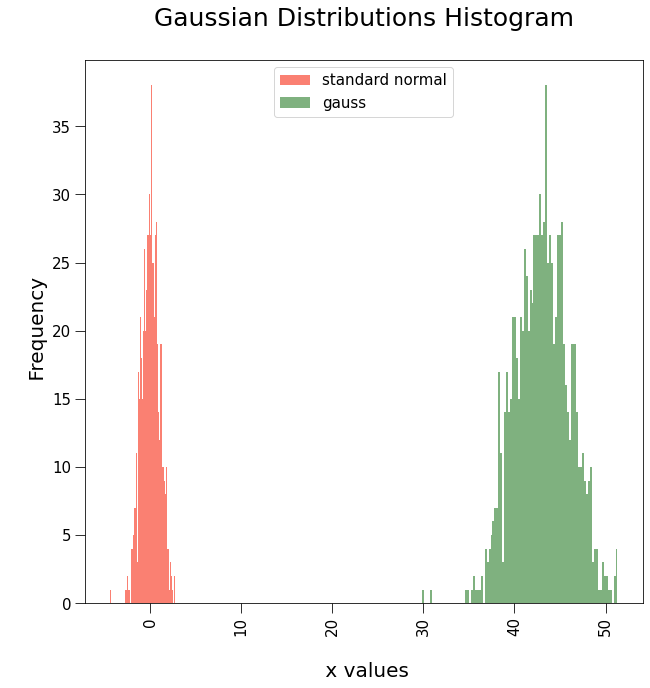

In [11]:
plt.figure(figsize = (10,10))

plt.hist(standard, bins  = 100, color  = 'salmon', label = 'standard normal')

plt.hist(shift_norm, bins  = 100, alpha  = 0.5, color  = 'darkgreen', label = 'gauss')


plt.legend(fontsize = 15)

plt.title("Gaussian Distributions Histogram\n", fontsize=25)

plt.xlabel("\n x values", fontsize=20)
plt.ylabel("\n Frequency", fontsize=20)

plt.tick_params(direction='out', length=10)

plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15, rotation=0)

plt.show()

A common "rule of thumb" states that Normally distributed data has the property that:

- $68\%$ of the data is within one standard deviation of the mean.

- $95\%$ of the data is within two standard deviations of the mean.

- $99.7 \%$ of the data is within three standard deviations of the mean.

We can empirically verify this rule by generating 1000 random points from the *Standard* Normal Distribution, and checking the proportion that fall within the given intervals.

To verify the above rule, lets calculate the following:

- what percent of data is (greater than -1 standard deviation from the mean) and (less than 1 standard deviation from the mean)?
- what percent of data is (greater than -2 standard deviations from the mean) and (less than 2 standard deviations from the mean)?
- what percent of data is (greater than -3 standard deviations from the mean) and (less than 3 standard deviations from the mean)?

We can calculate this using boolean logic as shown below

In [12]:
points = 1000
normal = np.random.randn(points)  # generate points
normal_std = np.std(normal)  # standard deviation of points
normal_mean = np.mean(normal)  # mean of points

# for each point, if the point is greater than 1 standard deviation below mean and is also less than 1 standard deviation 
# above the mean, point evaluates to True; else False
one = (-1*normal_std + normal_mean < normal) & (1*normal_std + normal_mean > normal) 

# for each point, if the point is greater than 2 standard deviations below mean and is also less than 2 standard deviations 
# above the mean, point evaluates to True; else False
two = (-2*normal_std + normal_mean < normal) & (2*normal_std + normal_mean > normal)

# for each point, if the point is greater than 3 standard deviations below mean and is also less than 3 standard deviations 
# above the mean, point evaluates to True; else False
three = (-3*normal_std + normal_mean < normal) & (3*normal_std + normal_mean > normal)

# since True=1 and False=0, we can sum the array and divide by 1000 to get a proportion. Then convert to percent by multiplying
# proportion by 100
print(f"The percent of data within 1 standard deviation of the mean: {100 * sum(one)/points}")
print(f"The percent of data within 2 standard deviations of the mean: {100 * sum(two)/points}")
print(f"The percent of data within 3 standard deviations of the mean: {100 * sum(three)/points}")

The percent of data within 1 standard deviation of the mean: 67.6
The percent of data within 2 standard deviations of the mean: 96.2
The percent of data within 3 standard deviations of the mean: 99.8


The above percents clearly verify the rule of thumb.

<b>We can also use integration to verify the above rules of thumb on the *Standard* Normal Distribution.</b>

We can find the probability of an event occuring within a range by integrating on a definite integral. We will need to integrate the normal probability density function
$$
P(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}.
$$
from -1 to 1, -2 to 2, and -3 to 3 in order to verify the numbers we got above.

Because we know mu = 0 and the standard deviation is 1, we can simplify as follows:
$$
P(x) = \frac{1}{\sqrt{2 \pi}} e^{\frac{(-x)^2}{2}}.
$$
    
Now lets implement this as a Python function.

In [13]:
def integrate_normal(arr):
    """ 
    Our normal probability density function
    
    Return (1/(2pi ^ 0.5)) * e ^ ((-x^2)/2)
    """
    c = 1 / np.sqrt(2 * np.pi)
    return (c * np.exp((-arr**2) / 2)) # np.exp(x) == e^x


Now we can integrate using the quad function in order to find the percent of data that falls in each interval of the density function:

In [14]:
print(f"Percent of data within 1 standard deviation from the mean: {round(100*quad(integrate_normal, -1, 1)[0], 2)}%")
print(f"Percent of data within 1 standard deviation from the mean: {round(100*quad(integrate_normal, -2, 2)[0], 2)}%")
print(f"Percent of data within 1 standard deviation from the mean: {round(100*quad(integrate_normal, -3, 3)[0], 2)}%")

Percent of data within 1 standard deviation from the mean: 68.27%
Percent of data within 1 standard deviation from the mean: 95.45%
Percent of data within 1 standard deviation from the mean: 99.73%


The numbers calculated by integrating are roughly the same as what we got by simulating. Thus, we have verified our rule of thumb!